/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score: 0.5641382304050009


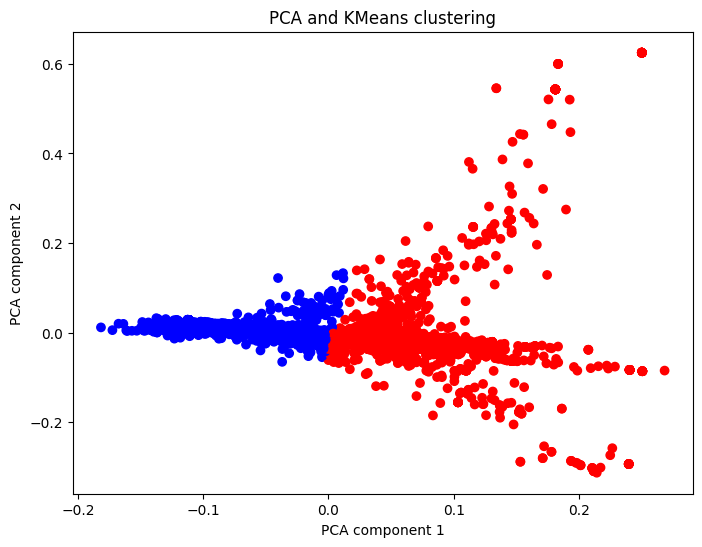

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load train.csv and test.csv files and concatenate them
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combined_df = pd.concat([train_df, test_df])

# Remove the id and target columns
combined_df.drop(columns=["id", "target"], inplace=True)

# Preprocess the text data using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
text_vectors = vectorizer.fit_transform(combined_df["text"])

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)
pca_vectors = pca.fit_transform(text_vectors.toarray())

# Use KMeans to cluster the PCA vectors into 2 clusters (ham and spam)
kmeans = KMeans(n_clusters=2, random_state=42).fit(pca_vectors)

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(pca_vectors, kmeans.labels_)
print("Silhouette score:", silhouette_avg)

# Visualize the clustering results
fig, ax = plt.subplots(figsize=(8, 6))
colors = np.array(["red", "blue"])
ax.scatter(pca_vectors[:, 0], pca_vectors[:, 1], c=colors[kmeans.labels_])
ax.set_title("PCA and KMeans clustering")
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")
plt.show()